
# **Lab #1: การจัดการข้อมูลพื้นฐาน**
## **วัตถุประสงค์**
1. เรียนรู้การใช้งาน Python เบื้องต้นสำหรับการจัดการข้อมูล
2. เรียนรู้การใช้ไลบรารีสำคัญ เช่น Pandas และ GeoPandas
3. เรียนรู้การอ่าน/เขียนและสำรวจข้อมูลทางภูมิศาสตร์ (GeoData)

---
หมายเหตุ บางครั้งอาจจะเจอ Bug. ขอจงอย่าย่อท้อ ให้ใช้ทรัพยากรที่มีอยู่ในการจัดการแก้ไขปัญหา เช่น  Gemini หรือ ChatGPT แต่ทั้งนี้ต้องทำความเข้าใจกับคำตอบที่ได้ เพราะบางครั้ง AI ก็ให้คำตอบแบบงงๆ



## **1. การเริ่มต้นใช้งาน Google Colab**
### **1.1 เชื่อมต่อ Google Drive**
ก่อนอื่น ให้เชื่อมต่อ Google Drive เพื่อจัดเก็บข้อมูลของคุณ
    

In [ ]:

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive



### **1.2 ติดตั้งไลบรารีที่จำเป็น**
ติดตั้งไลบรารีที่จำเป็นสำหรับการจัดการข้อมูลและการวิเคราะห์ข้อมูลภูมิศาสตร์
    

In [26]:

!pip install pandas geopandas matplotlib



## **2. การจัดการข้อมูลตารางด้วย Pandas**
### **2.1 สร้าง DataFrame ตัวอย่าง**
ลองสร้าง DataFrame ข้อมูลประชากรของประเทศในภูมิภาค ASEAN
    

In [28]:
import pandas as pd

# สร้าง DataFrame ตัวอย่าง
data = {
    'ประเทศ': ['ไทย', 'ลาว', 'กัมพูชา', 'เวียดนาม'],
    'ประชากร (ล้าน)': [69.8, 7.1, 16.5, 97.3],
    'พื้นที่ (ตร.กม.)': [513120, 236800, 181035, 331210]
}
df = pd.DataFrame(data)

# แสดงข้อมูล
print(df)

# คำนวณความหนาแน่นประชากร
df['ความหนาแน่นประชากร (คน/ตร.กม.)'] = df['ประชากร (ล้าน)'] * 1_000_000 / df['พื้นที่ (ตร.กม.)']
print(df)

     ประเทศ  ประชากร (ล้าน)  พื้นที่ (ตร.กม.)
0       ไทย            69.8            513120
1       ลาว             7.1            236800
2   กัมพูชา            16.5            181035
3  เวียดนาม            97.3            331210
     ประเทศ  ประชากร (ล้าน)  พื้นที่ (ตร.กม.)  ความหนาแน่นประชากร (คน/ตร.กม.)
0       ไทย            69.8            513120                      136.030558
1       ลาว             7.1            236800                       29.983108
2   กัมพูชา            16.5            181035                       91.142597
3  เวียดนาม            97.3            331210                      293.771323



### **2.2 การอ่านไฟล์ข้อมูล CSV**
- ให้นักศึกษาหาข้อมูลที่น่าสนใจในรูปแบบ  CSV
- โหลด File .csv เข้า google drive ของนักศึกษา
- จากนั้นให้ไปดูใน file_path ในรูป โฟลเดอร์ ด้านซ้ายบน
    

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd # Import the pandas library

# ตัวอย่างการอ่านไฟล์ CSV
file_path = '/content/data.csv'
geo_df = pd.read_csv(file_path)

# ตรวจสอบข้อมูล
print(geo_df.head())
print(geo_df.info())

   Year Phuket visitor Phuket Revenue (m baht)
0  1988        884,293                     NaN
1  1989        971,683                6,705.89
2  1990      1,254,215                8,574.27
3  1991      1,208,594               10,699.99
4  1992      1,633,496               33,891.17
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Year                     37 non-null     int64 
 1   Phuket visitor           37 non-null     object
 2   Phuket Revenue (m baht)  36 non-null     object
dtypes: int64(1), object(2)
memory usage: 1020.0+ bytes
None


**ตอบคำถาม 5 คะแนน**

จงใช้สันชาตญาณนักภูมิศาสตร์ อธิบายข้อมูลที่ได้ ว่าเป็นข้อมูลเกี่ยวกับอะไร

ตอบ ข้อมูลนี้เกี่ยวกับภาคการท่องเที่ยวของจังหวัดภูเก็ต ประเทศไทยครับ ประกอบด้วย Year ปีที่เป็นข้อมูล Phuket visitor จำนวนนักท่องเที่ยวที่มาเยือนภูเก็ตในแต่ละปี Phuket Revenue (m baht) รายได้จากการท่องเที่ยวของภูเก็ตในหน่วยล้านบาท


## **3. การจัดการข้อมูลภูมิศาสตร์ด้วย GeoPandas** 5 คะแนน
### **3.1 การอ่าน Shapefile และแสดงผล**
ใช้ข้อมูล Shapefile ที่มีขอบเขตและมีประชากร อาจจะหาจากแหล่งข้อมูลที่ เป็น Opendata เช่น
https://data.humdata.org/dataset/worldpop-population-density-for-thailand

    

                  adm3_name       adm3_name1 adm3_name2 adm3_name3 adm3_pcode  \
0  Phraborom Maharatchawang  พระบรมมหาราชวัง       None       None   TH100101   
1       Wang Burapha Phirom   วังบูรพาภิรมย์       None       None   TH100102   
2          Wat Ratchabophit       วัดราชบพิธ       None       None   TH100103   
3                Samran Rat      สำราญราษฎร์       None       None   TH100104   
4          San Chaopho Suea   ศาลเจ้าพ่อเสือ       None       None   TH100105   

     adm2_name adm2_name1 adm2_name2 adm2_name3 adm2_pcode  ... area_sqkm  \
0  Phra Nakhon     พระนคร       None       None     TH1001  ...  1.536555   
1  Phra Nakhon     พระนคร       None       None     TH1001  ...  0.726134   
2  Phra Nakhon     พระนคร       None       None     TH1001  ...  0.211758   
3  Phra Nakhon     พระนคร       None       None     TH1001  ...  0.229786   
4  Phra Nakhon     พระนคร       None       None     TH1001  ...  0.150440   

  version lang lang1 lang2 lang3                ad

Text(0.5, 1.0, 'Area in Square Kilometers')

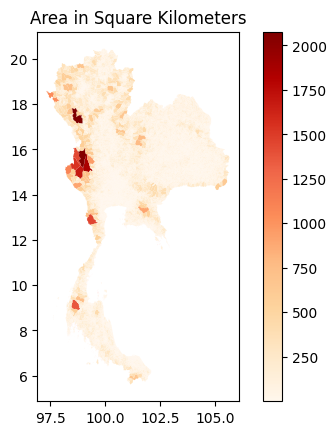

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt # เพิ่มบรรทัดนี้

# อ่านไฟล์ Shapefile
shapefile_path = '/content/drive/MyDrive/Ge234'
geo_data = gpd.read_file(shapefile_path)

# แสดงข้อมูลเบื้องต้น
print(geo_data.head())
print(geo_data.crs)

# แสดงผลข้อมูลบนแผนที่ โดยใช้คอลัมน์ 'area_sqkm' แทน 'population'
# หากมีคอลัมน์ประชากรที่ถูกต้อง ควรเปลี่ยนชื่อคอลัมน์ตรงนี้
geo_data.plot(column='area_sqkm', cmap='OrRd', legend=True)

plt.title('Area in Square Kilometers') # เพิ่มชื่อแผนที่ให้สอดคล้องกับคอลัมน์ที่พล็อต

In [ ]:
# แสดงชื่อคอลัมน์ทั้งหมดใน geo_data
print("Columns in geo_data:")
print(geo_data.columns.tolist())

# แสดงข้อมูล 5 แถวแรกของ geo_data เพื่อตรวจสอบเนื้อหาแต่ละคอลัมน์
print("\nFirst 5 rows of geo_data:")
display(geo_data.head())

Columns in geo_data:
['adm3_name', 'adm3_name1', 'adm3_name2', 'adm3_name3', 'adm3_pcode', 'adm2_name', 'adm2_name1', 'adm2_name2', 'adm2_name3', 'adm2_pcode', 'adm1_name', 'adm1_name1', 'adm1_name2', 'adm1_name3', 'adm1_pcode', 'adm0_name', 'adm0_name1', 'adm0_name2', 'adm0_name3', 'adm0_pcode', 'valid_on', 'valid_to', 'area_sqkm', 'version', 'lang', 'lang1', 'lang2', 'lang3', 'adm3_ref_n', 'center_lat', 'center_lon', 'geometry']

First 5 rows of geo_data:


,adm3_name,adm3_name1,adm3_name2,adm3_name3,adm3_pcode,adm2_name,adm2_name1,adm2_name2,adm2_name3,adm2_pcode,...,area_sqkm,version,lang,lang1,lang2,lang3,adm3_ref_n,center_lat,center_lon,geometry
0,Phraborom Maharatchawang,พระบรมมหาราชวัง,None,None,TH100101,Phra Nakhon,พระนคร,None,None,TH1001,...,1.536555,v01,en,th,None,None,Phraborom Maharatchawang,13.751552,100.491973,"POLYGON ((100.49453 13.75759, 100.49486 13.757..."
1,Wang Burapha Phirom,วังบูรพาภิรมย์,None,None,TH100102,Phra Nakhon,พระนคร,None,None,TH1001,...,0.726134,v01,en,th,None,None,Wang Burapha Phirom,13.743428,100.498948,"POLYGON ((100.50131 13.748, 100.5017 13.74798,..."
2,Wat Ratchabophit,วัดราชบพิธ,None,None,TH100103,Phra Nakhon,พระนคร,None,None,TH1001,...,0.211758,v01,en,th,None,None,Wat Ratchabophit,13.750375,100.499030,"POLYGON ((100.5014 13.74817, 100.50131 13.748,..."
3,Samran Rat,สำราญราษฎร์,None,None,TH100104,Phra Nakhon,พระนคร,None,None,TH1001,...,0.229786,v01,en,th,None,None,Samran Rat,13.750353,100.503238,"POLYGON ((100.50554 13.75378, 100.50516 13.752..."
4,San Chaopho Suea,ศาลเจ้าพ่อเสือ,None,None,TH100105,Phra Nakhon,พระนคร,None,None,TH1001,...,0.150440,v01,en,th,None,None,San Chaopho Suea,13.753887,100.497157,"POLYGON ((100.49875 13.7556, 100.49873 13.7555..."



## **4. การแสดงผลข้อมูล**
### **4.1 สร้างกราฟด้วย Matplotlib**  5 คะแนน
สร้างกราฟแสดงประชากรของแต่ละประเทศในภูมิภาค ASEAN โดยให้นักศึกษาทดลองหาข้อมูลเอง
    

In [34]:
print("First 5 rows of the DataFrame:")
display(df.head())

First 5 rows of the DataFrame:


,ประเทศ,ประชากร (ล้าน),พื้นที่ (ตร.กม.),ความหนาแน่นประชากร (คน/ตร.กม.)
0,ไทย,69.8,513120,136.030558
1,ลาว,7.1,236800,29.983108
2,กัมพูชา,16.5,181035,91.142597
3,เวียดนาม,97.3,331210,293.771323


In [35]:
print("\nDataFrame Information (datatypes, non-null counts):")
df.info()


DataFrame Information (datatypes, non-null counts):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 4 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ประเทศ                          4 non-null      object 
 1   ประชากร (ล้าน)                  4 non-null      float64
 2   พื้นที่ (ตร.กม.)                4 non-null      int64  
 3   ความหนาแน่นประชากร (คน/ตร.กม.)  4 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 260.0+ bytes


In [36]:
print("\nDescriptive Statistics:")
display(df.describe())


Descriptive Statistics:


,ประชากร (ล้าน),พื้นที่ (ตร.กม.),ความหนาแน่นประชากร (คน/ตร.กม.)
count,4.000000,4.000000,4.000000
mean,47.675000,315541.250000,137.731897
std,43.090477,145573.564357,112.740944
min,7.100000,181035.000000,29.983108
25%,14.150000,222858.750000,75.852725
50%,43.150000,284005.000000,113.586577
75%,76.675000,376687.500000,175.465749
max,97.300000,513120.000000,293.771323


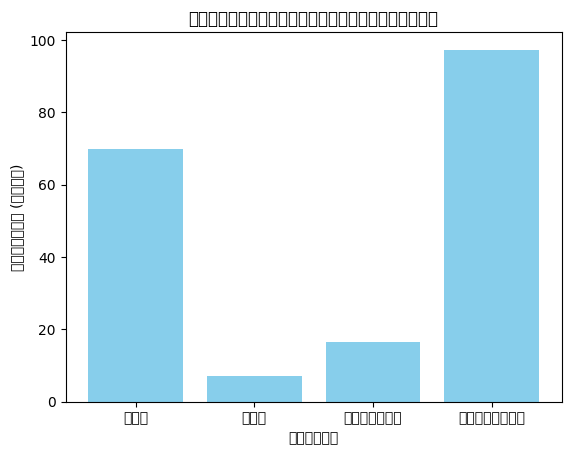

In [38]:
import matplotlib.pyplot as plt

# สร้างกราฟแสดงประชากร
plt.bar(df['ประเทศ'], df['ประชากร (ล้าน)'], color='skyblue')
plt.title('จำนวนประชากรในแต่ละประเทศ')
plt.xlabel('ประเทศ')
plt.ylabel('ประชากร (ล้าน)')
plt.show()


### **4.2 การรวมข้อมูลเชิงพื้นที่และตาราง**
รวมข้อมูล Shapefile กับข้อมูลประชากรเพื่อแสดงข้อมูลประชากรในแต่ละจังหวัด โดยให้นักศึกษาทดลองหาข้อมูลเอง
    

In [50]:

# รวมข้อมูล
merged_data = geo_data.merge(df, left_on='province', right_on='ประเทศ')

# แสดงผลข้อมูลในแผนที่
merged_data.plot(column='ประชากร (ล้าน)', cmap='OrRd', legend=True, figsize=(12, 8))
plt.title('ประชากรในแต่ละจังหวัด')
plt.show()


KeyError: 'province'

In [49]:
import pandas as pd

# Attempt to merge geo_data with df using 'adm1_name' and 'ประเทศ'
# We use a 'left' merge to keep all geometries from geo_data,
# and see if any 'df' data joins.
merged_data = geo_data.merge(df, left_on='adm1_name', right_on='ประเทศ', how='left')

print("Merged DataFrame Head:")
display(merged_data.head())

print("\nNumber of rows in merged_data:", len(merged_data))
print("Number of non-null values in 'ประชากร (ล้าน)' after merge:", merged_data['ประชากร (ล้าน)'].count())

Merged DataFrame Head:


,adm3_name,adm3_name1,adm3_name2,adm3_name3,adm3_pcode,adm2_name,adm2_name1,adm2_name2,adm2_name3,adm2_pcode,...,lang2,lang3,adm3_ref_n,center_lat,center_lon,geometry,ประเทศ,ประชากร (ล้าน),พื้นที่ (ตร.กม.),ความหนาแน่นประชากร (คน/ตร.กม.)
0,Phraborom Maharatchawang,พระบรมมหาราชวัง,None,None,TH100101,Phra Nakhon,พระนคร,None,None,TH1001,...,None,None,Phraborom Maharatchawang,13.751552,100.491973,"POLYGON ((100.49453 13.75759, 100.49486 13.757...",NaN,NaN,NaN,NaN
1,Wang Burapha Phirom,วังบูรพาภิรมย์,None,None,TH100102,Phra Nakhon,พระนคร,None,None,TH1001,...,None,None,Wang Burapha Phirom,13.743428,100.498948,"POLYGON ((100.50131 13.748, 100.5017 13.74798,...",NaN,NaN,NaN,NaN
2,Wat Ratchabophit,วัดราชบพิธ,None,None,TH100103,Phra Nakhon,พระนคร,None,None,TH1001,...,None,None,Wat Ratchabophit,13.750375,100.499030,"POLYGON ((100.5014 13.74817, 100.50131 13.748,...",NaN,NaN,NaN,NaN
3,Samran Rat,สำราญราษฎร์,None,None,TH100104,Phra Nakhon,พระนคร,None,None,TH1001,...,None,None,Samran Rat,13.750353,100.503238,"POLYGON ((100.50554 13.75378, 100.50516 13.752...",NaN,NaN,NaN,NaN
4,San Chaopho Suea,ศาลเจ้าพ่อเสือ,None,None,TH100105,Phra Nakhon,พระนคร,None,None,TH1001,...,None,None,San Chaopho Suea,13.753887,100.497157,"POLYGON ((100.49875 13.7556, 100.49873 13.7555...",NaN,NaN,NaN,NaN



Number of rows in merged_data: 7425
Number of non-null values in 'ประชากร (ล้าน)' after merge: 0


### การรวมข้อมูลภูมิศาสตร์กับข้อมูลประชากรรายจังหวัด และการแสดงผล

ขั้นตอนนี้จะทำการรวม `geo_data` กับ `df_population` โดยใช้ `adm1_name` จาก `geo_data` และคอลัมน์ที่ระบุโดย `province_col_name` จาก `df_population` เป็นคีย์ในการรวม หลังจากนั้นจะแสดงข้อมูลที่รวมแล้วและพล็อตผลลัพธ์บนแผนที่ครับ


## **โจทย์สำหรับนักศึกษา** 15 คะแนน
1. ลองเพิ่มประเทศใหม่ใน DataFrame พร้อมคำนวณความหนาแน่นประชากร (5 คะแนน)
2. นำไฟล์ Shapefile ของพื้นที่อื่นมาแสดงผลใน GeoPandas (5 คะแนน)
3. ลองสร้างแผนที่ด้วยสีที่แตกต่างกันโดยใช้ค่าอื่น เช่น `area` หรือ `density` (5 คะแนน)

---

### **หมายเหตุ**
- ดาวน์โหลดข้อมูลจากแหล่ง Open Data เช่น [World Bank Open Data](https://data.worldbank.org) หรือ [Thailand Data Catalog](https://data.go.th)
- ใส่เครดิตแหล่งข้อมูลในรายงานของคุณ
    

## 1. ลองเพิ่มประเทศใหม่ใน DataFrame พร้อมคำนวณความหนาแน่นประชากร

In [ ]:
import pandas as pd

# สร้าง DataFrame ตัวอย่าง
data = {
    'ประเทศ': ['ไทย', 'ลาว', 'กัมพูชา', 'เวียดนาม','สิงคโปร์'],
    'ประชากร (ล้าน)': [69.8, 7.1, 16.5, 97.3, 5.7],
    'พื้นที่ (ตร.กม.)': [513120, 236800, 181035, 331210, 728]
}
df = pd.DataFrame(data)

# แสดงข้อมูล
display(df)

# คำนวณความหนาแน่นประชากร
df['ความหนาแน่นประชากร (คน/ตร.กม.)'] = df['ประชากร (ล้าน)'] * 1_000_000 / df['พื้นที่ (ตร.กม.)']
display(df)

,ประเทศ,ประชากร (ล้าน),พื้นที่ (ตร.กม.)
0,ไทย,69.8,513120
1,ลาว,7.1,236800
2,กัมพูชา,16.5,181035
3,เวียดนาม,97.3,331210
4,สิงคโปร์,5.7,728


,ประเทศ,ประชากร (ล้าน),พื้นที่ (ตร.กม.),ความหนาแน่นประชากร (คน/ตร.กม.)
0,ไทย,69.8,513120,136.030558
1,ลาว,7.1,236800,29.983108
2,กัมพูชา,16.5,181035,91.142597
3,เวียดนาม,97.3,331210,293.771323
4,สิงคโปร์,5.7,728,7829.670330


## 2. นำไฟล์ Shapefile ของพื้นที่อื่นมาแสดงผลใน GeoPandas



                  adm3_name       adm3_name1 adm3_name2 adm3_name3 adm3_pcode  \
0  Phraborom Maharatchawang  พระบรมมหาราชวัง       None       None   TH100101   
1       Wang Burapha Phirom   วังบูรพาภิรมย์       None       None   TH100102   
2          Wat Ratchabophit       วัดราชบพิธ       None       None   TH100103   
3                Samran Rat      สำราญราษฎร์       None       None   TH100104   
4          San Chaopho Suea   ศาลเจ้าพ่อเสือ       None       None   TH100105   

     adm2_name adm2_name1 adm2_name2 adm2_name3 adm2_pcode  ... area_sqkm  \
0  Phra Nakhon     พระนคร       None       None     TH1001  ...  1.536555   
1  Phra Nakhon     พระนคร       None       None     TH1001  ...  0.726134   
2  Phra Nakhon     พระนคร       None       None     TH1001  ...  0.211758   
3  Phra Nakhon     พระนคร       None       None     TH1001  ...  0.229786   
4  Phra Nakhon     พระนคร       None       None     TH1001  ...  0.150440   

  version lang lang1 lang2 lang3                ad

Text(0.5, 1.0, 'Area in Square Kilometers')

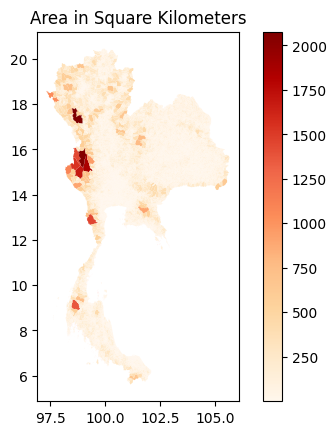

In [47]:
import geopandas as gpd

# อ่านไฟล์ Shapefile
shapefile_path = '/content/drive/MyDrive/Ge234'
geopandas_version = gpd.__version__
# For geopandas < 0.10.0, use 'shapefile_path'
# For geopandas >= 0.10.0, use 'path'
if geopandas_version < '0.10.0':
    geo_data = gpd.read_file(shapefile_path)
else:
    geo_data = gpd.read_file(shapefile_path)

# แสดงข้อมูลเบื้องต้น
print(geo_data.head())
print(geo_data.crs)

# แสดงผลข้อมูลบนแผนที่ โดยใช้คอลัมน์ 'area_sqkm' แทน 'population'
# หากมีคอลัมน์ประชากรที่ถูกต้อง ควรเปลี่ยนชื่อคอลัมน์ตรงนี้
geo_data.plot(column='area_sqkm', cmap='OrRd', legend=True)

import matplotlib.pyplot as plt # Make sure matplotlib is imported if not already
plt.title('Area in Square Kilometers') # เพิ่มชื่อแผนที่ให้สอดคล้องกับคอลัมน์ที่พล็อต

Successfully loaded new Shapefile from: /content/drive/MyDrive/Ge234

First 5 rows of new_geo_data:


,adm3_name,adm3_name1,adm3_name2,adm3_name3,adm3_pcode,adm2_name,adm2_name1,adm2_name2,adm2_name3,adm2_pcode,...,area_sqkm,version,lang,lang1,lang2,lang3,adm3_ref_n,center_lat,center_lon,geometry
0,Phraborom Maharatchawang,พระบรมมหาราชวัง,None,None,TH100101,Phra Nakhon,พระนคร,None,None,TH1001,...,1.536555,v01,en,th,None,None,Phraborom Maharatchawang,13.751552,100.491973,"POLYGON ((100.49453 13.75759, 100.49486 13.757..."
1,Wang Burapha Phirom,วังบูรพาภิรมย์,None,None,TH100102,Phra Nakhon,พระนคร,None,None,TH1001,...,0.726134,v01,en,th,None,None,Wang Burapha Phirom,13.743428,100.498948,"POLYGON ((100.50131 13.748, 100.5017 13.74798,..."
2,Wat Ratchabophit,วัดราชบพิธ,None,None,TH100103,Phra Nakhon,พระนคร,None,None,TH1001,...,0.211758,v01,en,th,None,None,Wat Ratchabophit,13.750375,100.499030,"POLYGON ((100.5014 13.74817, 100.50131 13.748,..."
3,Samran Rat,สำราญราษฎร์,None,None,TH100104,Phra Nakhon,พระนคร,None,None,TH1001,...,0.229786,v01,en,th,None,None,Samran Rat,13.750353,100.503238,"POLYGON ((100.50554 13.75378, 100.50516 13.752..."
4,San Chaopho Suea,ศาลเจ้าพ่อเสือ,None,None,TH100105,Phra Nakhon,พระนคร,None,None,TH1001,...,0.150440,v01,en,th,None,None,San Chaopho Suea,13.753887,100.497157,"POLYGON ((100.49875 13.7556, 100.49873 13.7555..."



CRS of new_geo_data:
EPSG:4326

Columns in new_geo_data:
['adm3_name', 'adm3_name1', 'adm3_name2', 'adm3_name3', 'adm3_pcode', 'adm2_name', 'adm2_name1', 'adm2_name2', 'adm2_name3', 'adm2_pcode', 'adm1_name', 'adm1_name1', 'adm1_name2', 'adm1_name3', 'adm1_pcode', 'adm0_name', 'adm0_name1', 'adm0_name2', 'adm0_name3', 'adm0_pcode', 'valid_on', 'valid_to', 'area_sqkm', 'version', 'lang', 'lang1', 'lang2', 'lang3', 'adm3_ref_n', 'center_lat', 'center_lon', 'geometry']

Plotting basic map of new_geo_data...


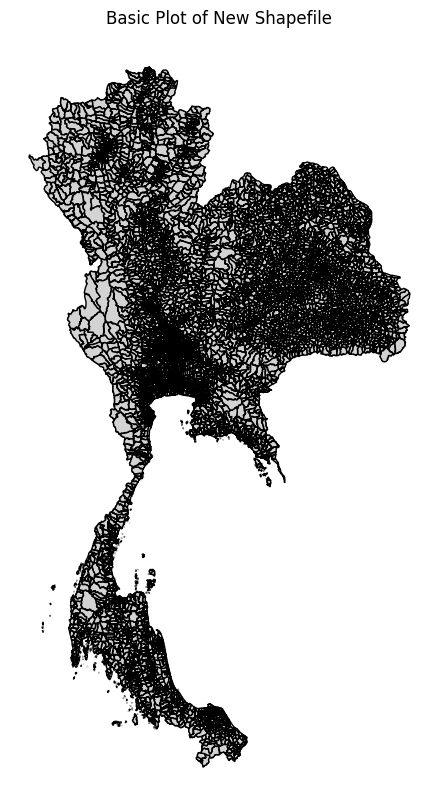

In [43]:
import geopandas as gpd
import matplotlib.pyplot as plt


new_shapefile_path = '/content/drive/MyDrive/Ge234'
try:
    # อ่านไฟล์ Shapefile ใหม่
    new_geo_data = gpd.read_file(new_shapefile_path)

    print(f"Successfully loaded new Shapefile from: {new_shapefile_path}")

    # แสดงข้อมูลเบื้องต้นของ Shapefile ใหม่
    print("\nFirst 5 rows of new_geo_data:")
    display(new_geo_data.head())
    print("\nCRS of new_geo_data:")
    print(new_geo_data.crs)

    # แสดงชื่อคอลัมน์ทั้งหมดใน new_geo_data
    print("\nColumns in new_geo_data:")
    print(new_geo_data.columns.tolist())

    # พล็อตแผนที่เบื้องต้น
    print("\nPlotting basic map of new_geo_data...")
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    new_geo_data.plot(ax=ax, color='lightgray', edgecolor='black')
    ax.set_title('Basic Plot of New Shapefile')
    ax.set_axis_off()
    plt.show()

except FileNotFoundError:
    print(f"Error: New Shapefile not found at {new_shapefile_path}. Please check the path and ensure all associated files (.shx, .dbf, etc.) are present.")
except Exception as e:
    print(f"An error occurred while reading the new Shapefile: {e}")

## 3. ลองสร้างแผนที่ด้วยสีที่แตกต่างกันโดยใช้ค่าอื่น เช่น area หรือ density

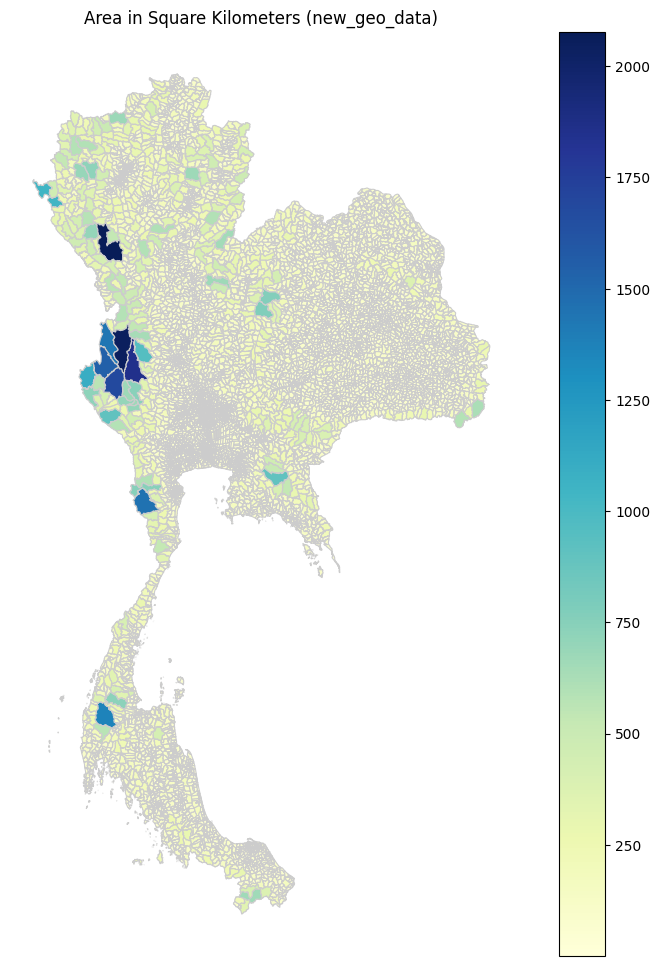

In [ ]:
import matplotlib.pyplot as plt
new_shapefile_path = '/content/drive/MyDrive/Ge234'

if 'new_geo_data' in locals() and 'area_sqkm' in new_geo_data.columns:
    fig, ax = plt.subplots(1, 1, figsize=(12, 12))
    new_geo_data.plot(column='area_sqkm', cmap='YlGnBu', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
    ax.set_title('Area in Square Kilometers (new_geo_data)')
    ax.set_axis_off() # ซ่อนแกน x และ y
    plt.show()
else:
    print("Error: 'new_geo_data' not found or 'area_sqkm' column is missing.")
    print("Please ensure you have successfully loaded your new Shapefile and it contains an 'area_sqkm' column.")



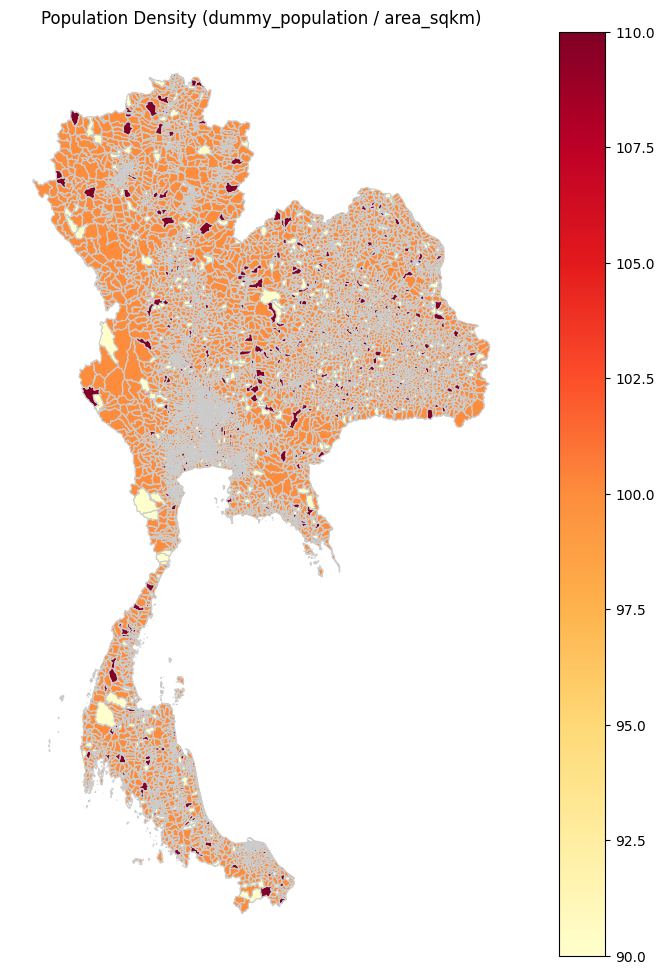

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd


# ตัวอย่าง: สร้างคอลัมน์ประชากรจำลอง หากคุณไม่มีข้อมูลประชากรจริง
new_geo_data['dummy_population'] = new_geo_data['area_sqkm'] * 100 # สมมติความหนาแน่นเฉลี่ย 100 คน/ตร.กม.
population_column_to_use = 'dummy_population'


if 'new_geo_data' in locals() and population_column_to_use in new_geo_data.columns and 'area_sqkm' in new_geo_data.columns:
    # ตรวจสอบว่าคอลัมน์ประชากรและพื้นที่เป็นตัวเลขและไม่มีค่าว่างที่เป็นปัญหา
    new_geo_data[population_column_to_use] = pd.to_numeric(new_geo_data[population_column_to_use], errors='coerce')
    new_geo_data['area_sqkm'] = pd.to_numeric(new_geo_data['area_sqkm'], errors='coerce')

    # คำนวณความหนาแน่นประชากร
    new_geo_data['density'] = new_geo_data[population_column_to_use] / new_geo_data['area_sqkm']

    # พล็อตแผนที่ด้วยความหนาแน่น
    fig, ax = plt.subplots(1, 1, figsize=(12, 12))
    # ใช้ cmap ที่เหมาะสมกับการแสดงความหนาแน่น เช่น 'YlOrRd' หรือ 'OrRd'
    new_geo_data.plot(column='density', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
    ax.set_title(f'Population Density ({population_column_to_use} / area_sqkm)')
    ax.set_axis_off() # ซ่อนแกน x และ y
    plt.show()
else:
    print("Error: 'new_geo_data' not found, or required columns are missing for density calculation.")
    print(f"Please ensure new_geo_data is loaded and contains '{population_column_to_use}' and 'area_sqkm' columns.")
    print("Available columns in new_geo_data:", new_geo_data.columns.tolist() if 'new_geo_data' in locals() else "new_geo_data not found")